In [1]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank = pd.read_csv('bank-additional-full.csv', sep = ';')
# Converting dependent variable categorical to dummy
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## 1. Bank client data Analysis and Categorical Treatment

In [5]:
bank_client = bank.iloc[:, 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


### 1.1. Categorical variables

In [6]:
print('Jobs:\n', bank_client['job'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [7]:
print('Marital:\n', bank_client['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


In [8]:
print('Education:\n', bank_client['education'].unique())

Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [9]:
print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


### 1.2. Age

In [11]:
print('Min age:', bank_client['age'].max())
print('Max age:', bank_client['age'].min())
print('Null Values:', bank_client['age'].isnull().any())

Min age: 98
Max age: 17
Null Values: False


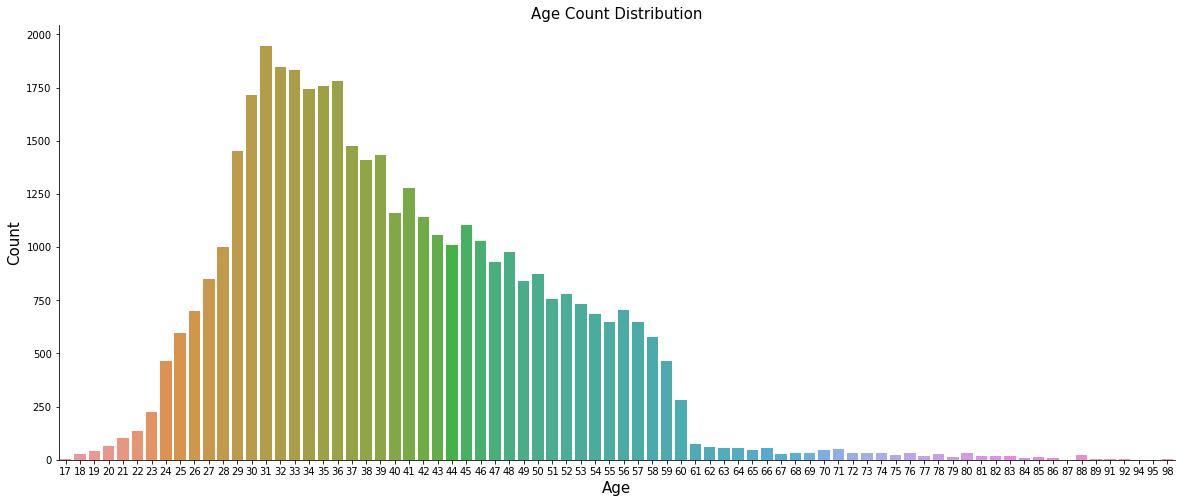

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

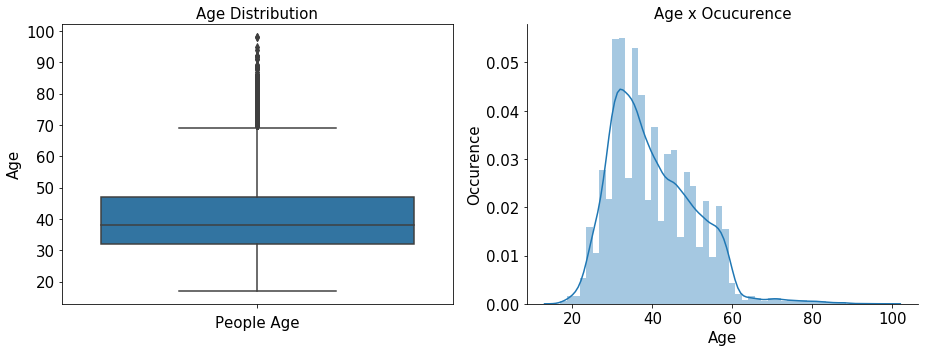

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = bank_client, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank_client['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [12]:
# Quartiles
print('# 1 Quartile: ', bank_client['age'].quantile(q = 0.25))
print('# 2 Quartile: ', bank_client['age'].quantile(q = 0.50))
print('# 3 Quartile: ', bank_client['age'].quantile(q = 0.75))
print('# 4 Quartile: ', bank_client['age'].quantile(q = 1.00))
    
print('Ages above >', bank_client['age'].quantile(q = 0.75) + 1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')

# 1 Quartile:  32.0
# 2 Quartile:  38.0
# 3 Quartile:  47.0
# 4 Quartile:  98.0
Ages above > 69.5 are outliers


In [13]:
print('Numerber of outliers:', bank_client[bank_client['age'] > 69.5]['age'].count())
print('Number of clients:', len(bank_client))
# Outliers in %
print('Outliers are:', round(bank_client[bank_client['age'] > 69.5]['age'].count()*100/len(bank_client),2), '%')

Numerber of outliers: 469
Number of clients: 41188
Outliers are: 1.14 %


In [15]:
print('MEAN:', round(bank_client['age'].mean(), 1))
print('Standard deviation:', round(bank_client['age'].std(), 1))
print('Coefficient Variation:',round(bank_client['age'].std()*100/bank_client['age'].mean(), 1))

MEAN: 40.0
Standard deviation: 10.4
Coefficient Variation: 26.0


### 1.3. Jobs

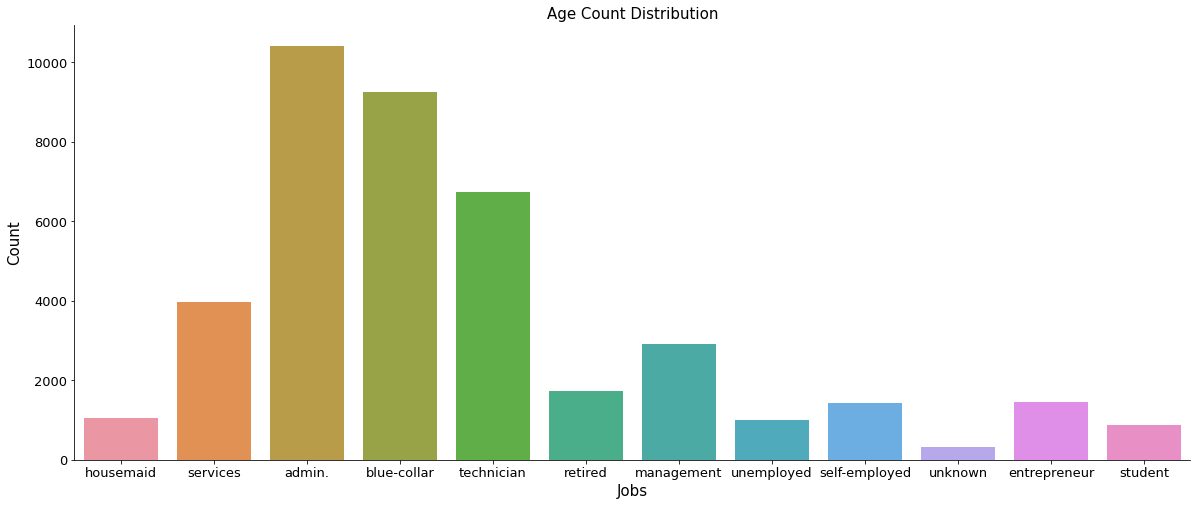

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Jobs', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=13)
sns.despine()

### 1.4. Marital

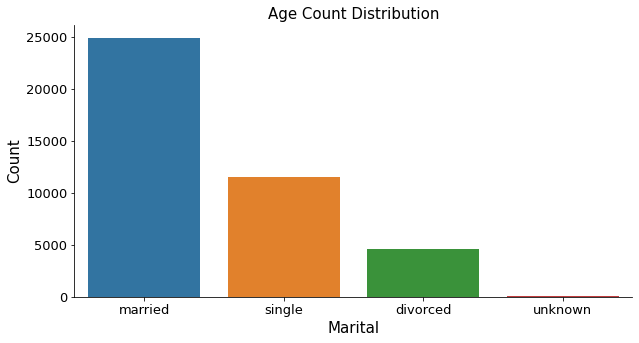

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=13)
sns.despine()

### 1.5. Education

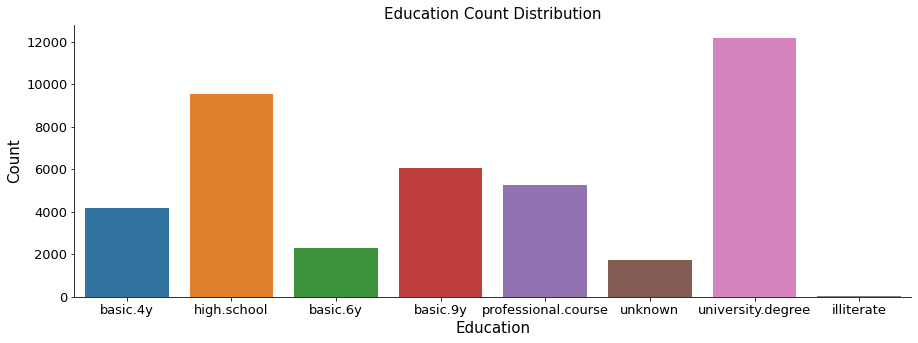

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=13)
sns.despine()

### 1.6. Default, Housing, Loan

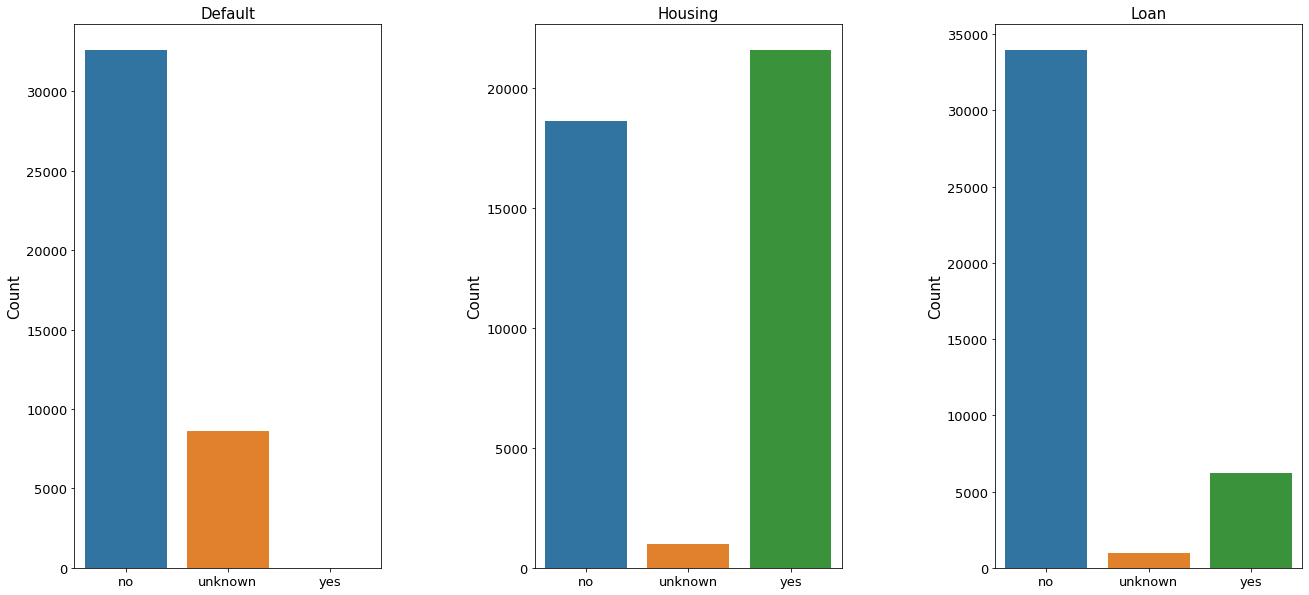

In [36]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (22, 10))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=13)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=13)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=13)

plt.subplots_adjust(wspace=0.5)

In [37]:
print('Default:\n  No credit in default:'     , bank_client[bank_client['default'] == 'no']     ['age'].count(),
              '\n  Unknown credit in default:', bank_client[bank_client['default'] == 'unknown']['age'].count(),
              '\n  Yes to credit in default:' , bank_client[bank_client['default'] == 'yes']    ['age'].count())

Default:
  No credit in default: 32588 
  Unknown credit in default: 8597 
  Yes to credit in default: 3


In [38]:
print('Housing:\n  No housing in loan:'     , bank_client[bank_client['housing'] == 'no']     ['age'].count(),
              '\n  Unknown housing in loan:', bank_client[bank_client['housing'] == 'unknown']['age'].count(),
              '\n  Yes to housing in loan:' , bank_client[bank_client['housing'] == 'yes']    ['age'].count())

Housing:
  No housing in loan: 18622 
  Unknown housing in loan: 990 
  Yes to housing in loan: 21576


In [39]:
print('Housing:\n  No to personal loan:'     , bank_client[bank_client['loan'] == 'no']     ['age'].count(),
              '\n  Unknown to personal loan:', bank_client[bank_client['loan'] == 'unknown']['age'].count(),
              '\n  Yes to personal loan:'    , bank_client[bank_client['loan'] == 'yes']    ['age'].count())

Housing:
  No to personal loan: 33950 
  Unknown to personal loan: 990 
  Yes to personal loan: 6248


### 1.7. Bank Client Categorical Treatment

In [43]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

In [44]:
# creat group of ages 
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [45]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,1,3,1,0,0,0,0
1,1,7,1,3,1,0,0
2,1,7,1,3,0,2,0
3,1,0,1,1,0,0,0
4,1,7,1,3,0,0,2


In [46]:
print(bank_client.shape)
bank_client.head()

(41188, 7)


,age,job,marital,education,default,housing,loan
0,1,3,1,0,0,0,0
1,1,7,1,3,1,0,0
2,1,7,1,3,0,2,0
3,1,0,1,1,0,0,0
4,1,7,1,3,0,0,2


## 2. Related with the last contact of the current campaign
- Treat categorical, see those values
- group continuous variables if necessary


In [47]:
# Slicing DataFrame to treat separately
bank_related = bank.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [48]:
bank_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [49]:
print("Kind of Contact: \n", bank_related['contact'].unique())
print("\nWhich month is this campaing work: \n", bank_related['month'].unique())
print("\nWhich days of week this campaing work: \n", bank_related['day_of_week'].unique())

Kind of Contact: 
 ['telephone' 'cellular']

Which month is this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


### 2.1 Duration

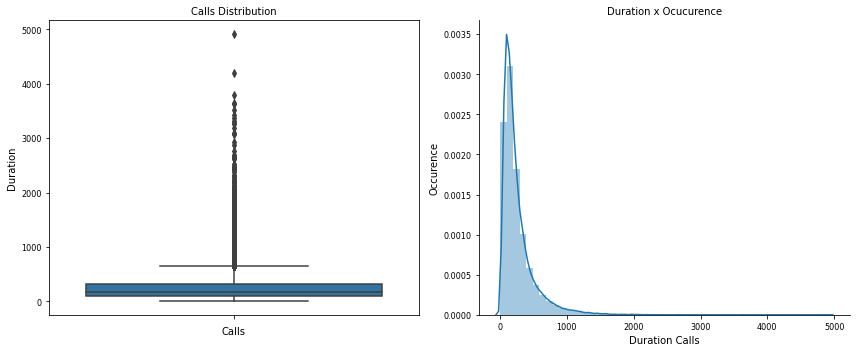

In [54]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
sns.boxplot(x = 'duration', data = bank_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=8)

sns.distplot(bank_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=8)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

Note: Duration has 1544 different values

In [56]:
print("Max duration call in minutes:", round((bank_related['duration'].max()/60),1))
print("Min duration call in minutes:", round((bank_related['duration'].min()/60),1))
print("Mean duration call in minutes:", round((bank_related['duration'].mean()/60),1))
print("STD duration call in minutes:", round((bank_related['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean 

Max duration call in minutes: 82.0
Min duration call in minutes: 0.0
Mean duration call in minutes: 4.3
STD duration call in minutes: 4.3


In [59]:
# Quartiles
print('# 1 Quartile: ', bank_related['duration'].quantile(q = 0.25))
print('# 2 Quartile: ', bank_related['duration'].quantile(q = 0.50))
print('# 3 Quartile: ', bank_related['duration'].quantile(q = 0.75))
print('# 4 Quartile: ', bank_related['duration'].quantile(q = 1.00))

print('Duration calls >', bank_related['duration'].quantile(q = 0.75) + 1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

# 1 Quartile:  102.0
# 2 Quartile:  180.0
# 3 Quartile:  319.0
# 4 Quartile:  4918.0
Duration calls > 644.5 are outliers


In [60]:
print('Numerber of outliers:', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients:', len(bank_related))
# Outliers in %
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count()*100/len(bank_related),2), '%')

Numerber of outliers: 2963
Number of clients: 41188
Outliers are: 7.19 %


In [69]:
bank_related[bank_related['duration'] > 644.5].count()

contact        2963
month          2963
day_of_week    2963
duration       2963
dtype: int64

In [62]:
# if the call duration is iqual to 0, then is obviously that this person didn't subscribed => delete later
bank[(bank['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


### 2.2 Contact, Month, Day of Week

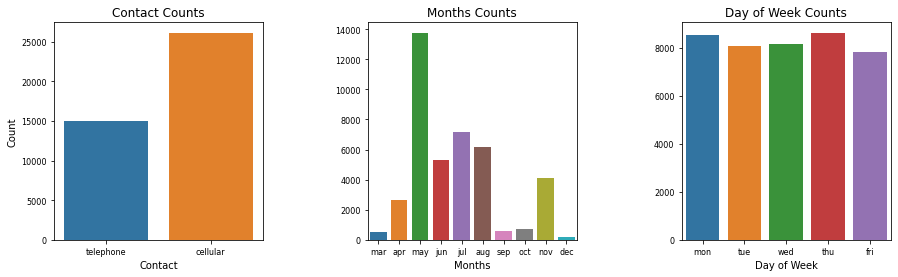

In [65]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,4))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=8)

sns.countplot(bank_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=8)

sns.countplot(bank_related['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=8)

plt.subplots_adjust(wspace=0.5)

## 2.1 Contact, Month, Day of Week treatment

In [70]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week']) 

In [71]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


In [72]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration'] = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration'] = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);

In [73]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


## 3. Social and economic context attributes

In [74]:
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


## 4. Other attributes

In [75]:
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [76]:
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [77]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)